#                            Project on Data Analysis and Data Visualisation


# Study report on Fast Food Restaurants


## Table of Contents

1. [Problem Statement](#section1)<br>
   - 1.1 [Approach](#section101)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
   - 3.1 [Website Data](#section301)<br/>
   - 3.2 [Online Order Analysis](#section302)<br/>
   - 3.3 [Province Chart](#section303)<br/>
   - 3.4 [Province Analysis](#section304)<br/>
4. [Strategy Analysis](#section4)
   - 4.1 [Postal Code Chart](#section401)<br/>
   - 4.2 [Postal Code Analysis](#section402)<br/>
5. [Conclusions](#section5)<br/>


<a id=section1></a>

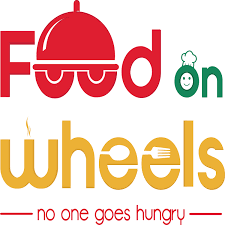
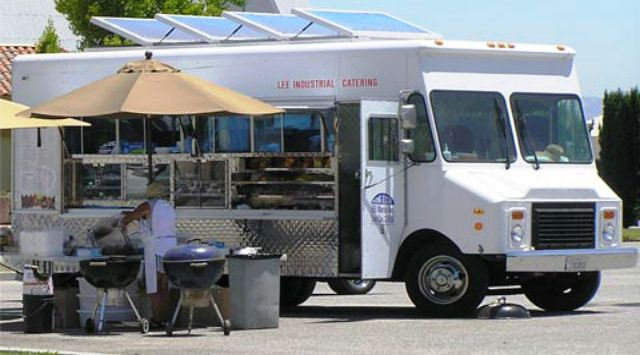

##### 1. Problem Statement -->

 Problem Statement : Opening new restaurant in US.<br/>
 Objective         : To identify location in given province for innovative restaurant ideas.<br/>
 Reference         : 10000 restaurants data made available by INSAID.<br/>
 Variables         : Address, City, Country, Key (unique number), latitude, longitude, Name, Postal Code, Province, Website<br/>
 Concept Map       : Opening a new restaurant in US by identifing locations where new innovative concepts of fast food can be
                     executed without directly affecting existing players. Food on Wheel !!<br/>
 Hypothesis        : Running low cost innovative business model in densely populated area is a profitable business within year.<br/>
 Tools             : Statistical Plots, Probability, MCT, Measure of Spread, Measures of Shape, Hypothesis Testing.

<a id=section101></a>

Approach -->><br/>
<br/>
Step 1 : Data cleanning<br/>
Step 2 : Data building<br/>
Step 3 : Functions<br/>
Step 4 : Data Analysis<br/>
Step 5 : Plots<br/>
Step 6 : Hypothesis Testing<br/>
Step 7 : Conclusion<br/>

<a id=section2></a>

##### 2. Data Loading -->

In [4]:
import sys
!{sys.executable} -m pip install pandas-profiling # If you get an error while importing pandas_profiling plz run this command

Invalid requirement: '#'
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output

In [5]:
fastfood_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv")

In [6]:
fastfood_data.shape

(10000, 10)

In [7]:
fastfood_backup_data = fastfood_data     # Because this is my first project

In [8]:
fastfood_backup_data.shape

(10000, 10)

<a id=section3></a>

##### 3. Data Profiling -->

In [9]:
profile = pandas_profiling.ProfileReport(fastfood_data)
profile.to_file(outputfile="fastfood_before_preprocessing.html")

<a id=section301></a>

Online orders can be obtain to increase sales for thoes who have websites facility.

In [10]:
print ("% Online order facility" , (100 - fastfood_data.websites.isnull().sum()/fastfood_data.websites.isnull().count()*100))

% Online order facility 95.35


<a id=section302></a>

###### Analysis :

More than 95% restaurants have websites assuming websites will have online order system in place.

<a id=section303></a>

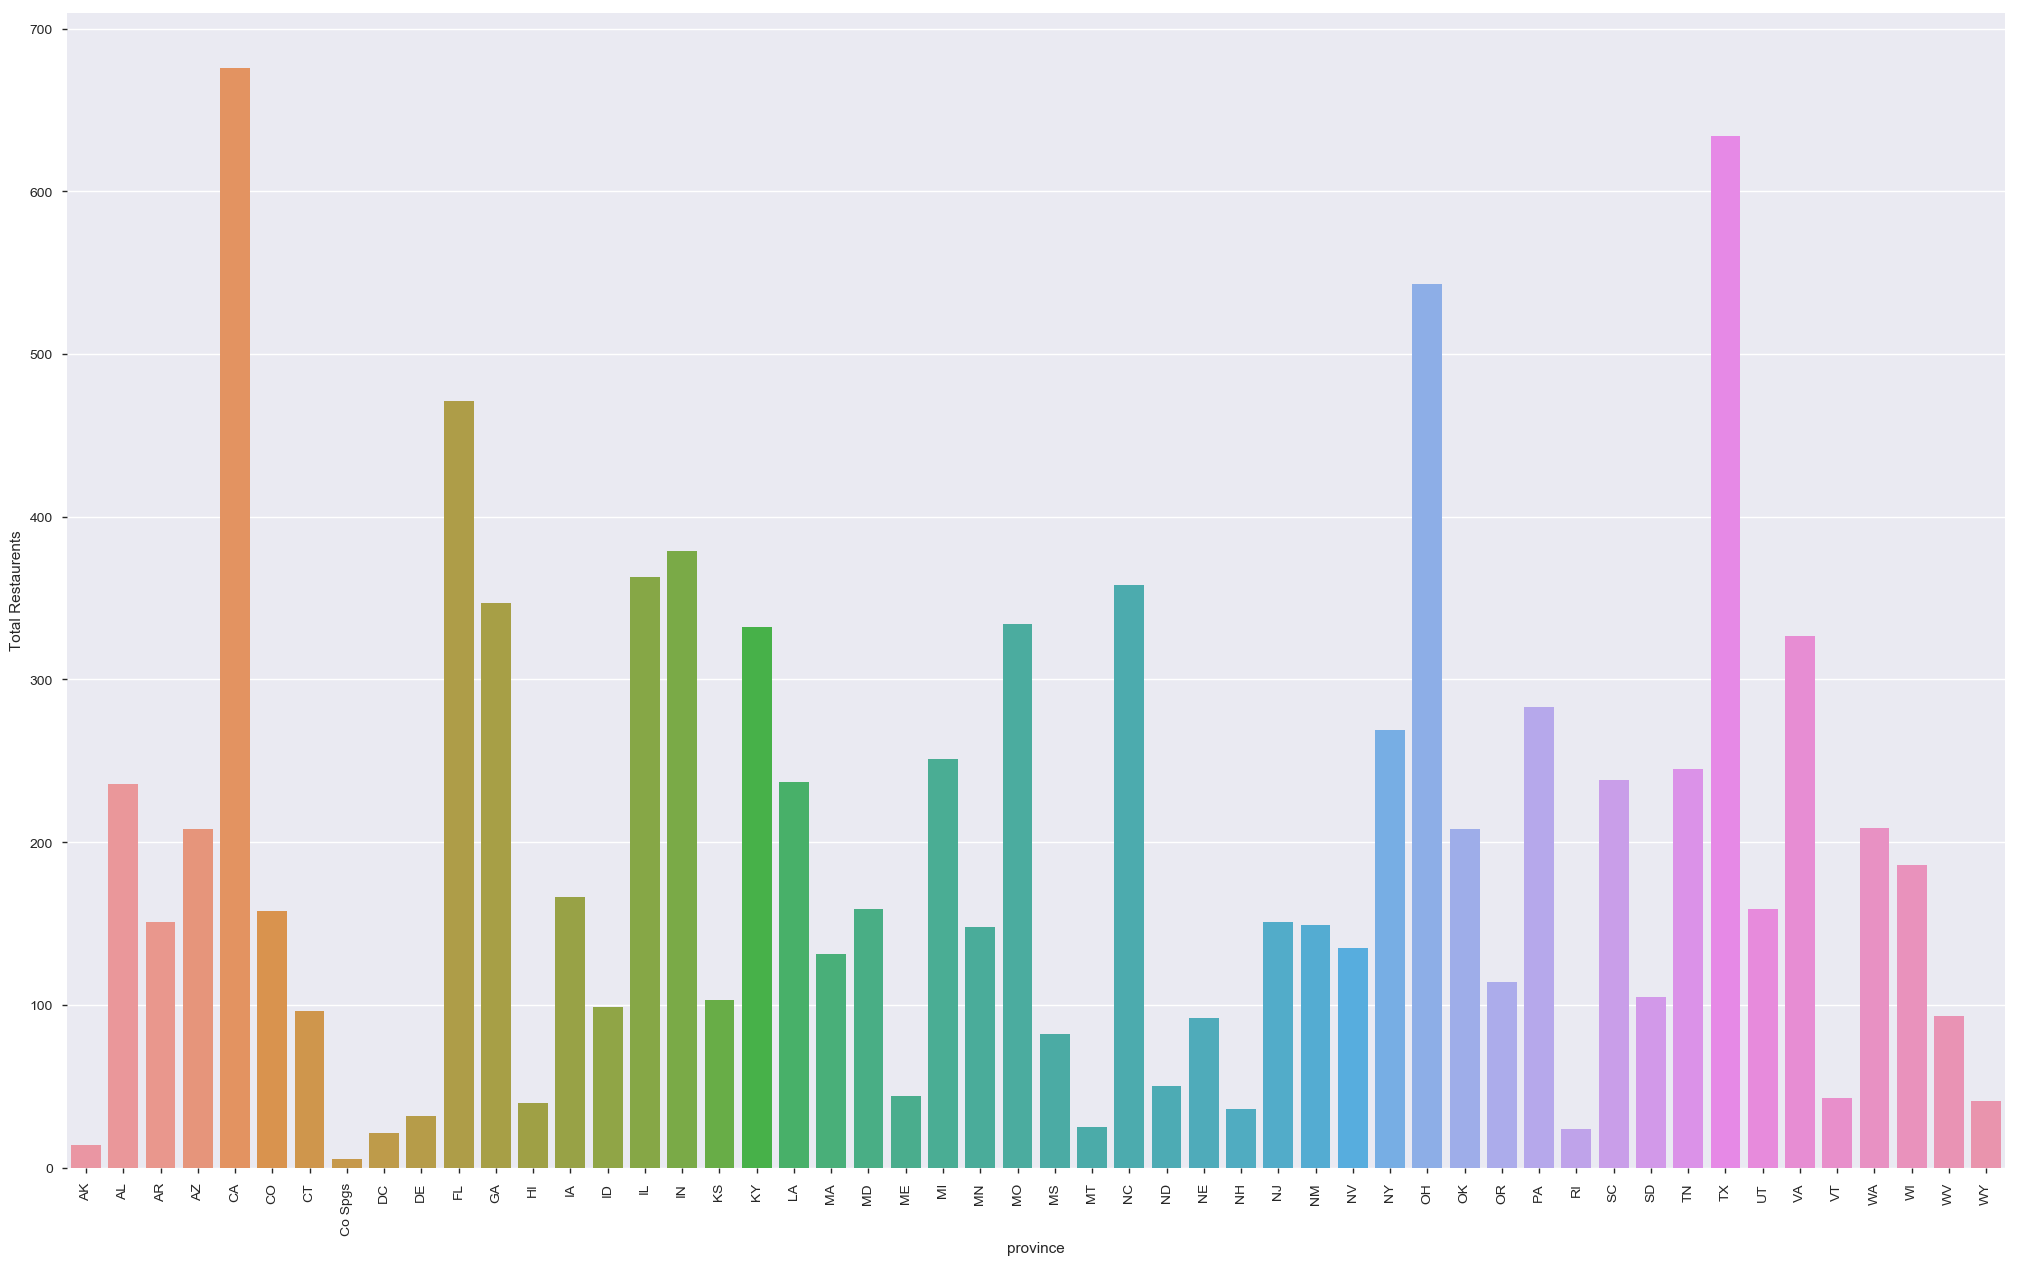

In [23]:
df = fastfood_data[['province' , 'city']].groupby('province')['city'].count().reset_index(name = 'Total Restaurents')
sns.barplot(x = 'province', y = 'Total Restaurents', data = df)
plt.xticks(rotation ='vertical')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.show()

Above bar graph explains the density of restaurants in each province, we can find most of the province have number of restaurant's outlets between 100 to 250. There are significant number of province which are having more than 300 restaurants. 

<a id=section304></a>

In [24]:
df.describe()

,Total Restaurents
count,52.000000
mean,192.307692
std,155.515277
min,5.000000
25%,89.500000
50%,154.500000
75%,255.500000
max,676.000000


###### Analysis :
We have total 52 province;<br/>
Maximum total restaurants are 676 in one province and minimum are 5;<br/>
On an average we have 192 restaurants in each province.<br/>
<br/>
Let's find more relative info regarding density of restaurants in each postalcode to identify sweet spot to open innovative restaurant "Food on Wheel".

<a id=section4></a>

##### 4. Deep Analysis -->

In [25]:
df = fastfood_data.groupby(['province','city','postalCode'])['postalCode'].count().reset_index(name = 'TotalRestaurants')
Conditions = [
    (df['TotalRestaurants'] > 11),
    (df['TotalRestaurants'] > 8),
    (df['TotalRestaurants'] > 5),
    (df['TotalRestaurants'] > 0)]

Choices = ['Level 3','Level 2','Level 1','None']
df['density'] = np.select(Conditions, Choices, default=0)
Competition = df[df['density']=='None']
df = df.drop(Competition.index, axis=0)

print (df)

     province               city postalCode  TotalRestaurents  density
46         AL             Dothan      36301                 8  Level 1
53         AL              Foley      36535                10  Level 2
113        AL  Owens Cross Roads      35763                 6  Level 1
152        AR             Conway      72032                 6  Level 1
183        AR           Maumelle      72113                 7  Level 1
205        AR         Springdale      72764                11  Level 2
243        AZ            Kingman      86401                 6  Level 1
577        CA       Palm Springs      92262                 6  Level 1
585        CA        Paso Robles      93446                 8  Level 1
586        CA          Patterson      95363                 6  Level 1
591        CA        Placerville      95667                 7  Level 1
603        CA           Redlands      92373                 6  Level 1
607        CA         Ridgecrest      93555                 6  Level 1
680   

<a id=section401></a>

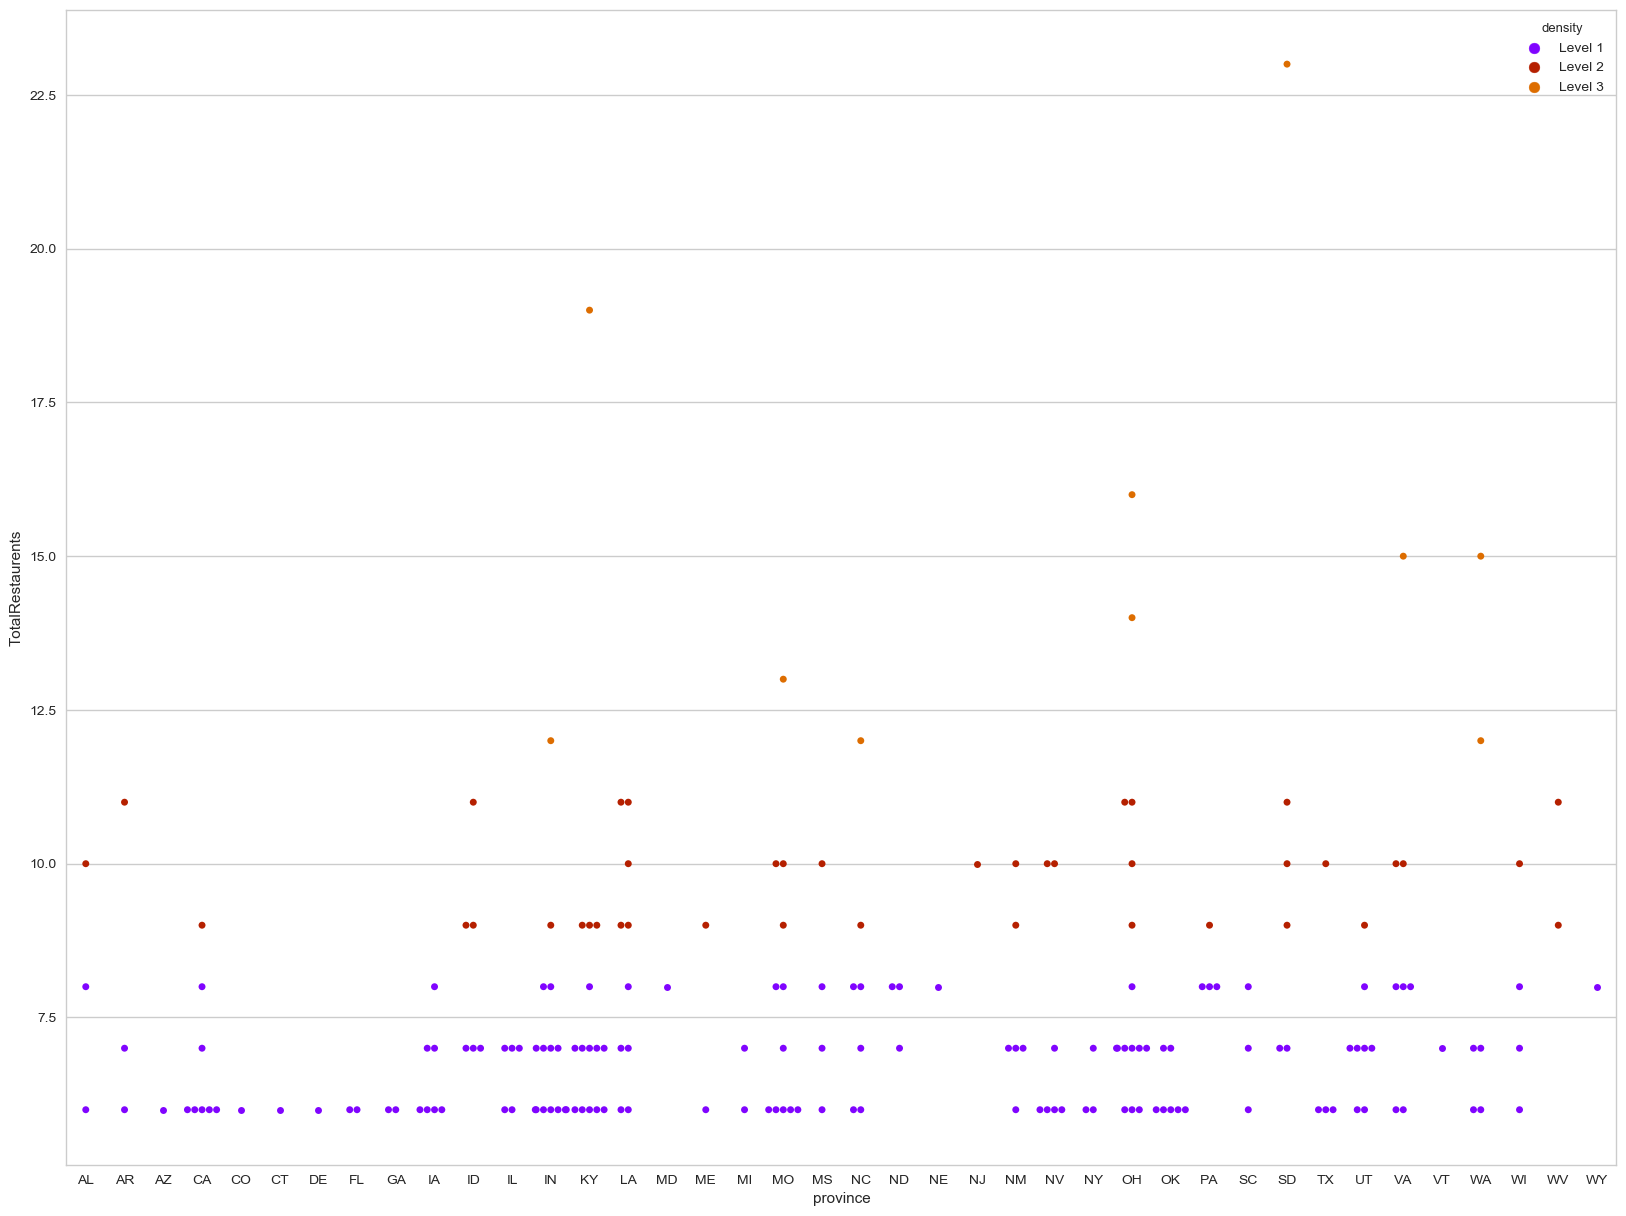

In [26]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="province", y="TotalRestaurants", hue="density", palette="gnuplot", data=df)

<a id=section402></a>

###### Analysis :
Take a closer look, surprisingly; Province like CA and TX having highest numbers of restaurants in graph 1 here in graph 2 has only 1 postalcode which is Level 2 competetive. Well we can derive competition level of each province and target specific postal code for our "Blue Ocean Strategy" or "Red Ocean Strategy".
Dots in this plot explains postalcode having number of restaurants which determines competition level of postal code area.

Types of Strategies :
1. Blue Ocean Strategy - Identify menu from website of restaurant and create a mouth watering innovative and creative dishes which are generally not offered by these restaurants. Product differentiation.
2. Red Ocean Strategy - At the lowest price make available each menu item and generate volume, this is possible because of no real estate cost, offer service differentiation like live telecast of sports matches by using top of vehicle, develop app ordering or online ordering system for targeted province or postal code ares, offer discount schemes and marketing strategies like happy hour, combo meals etc. Price differentiation combined with service differentiation.

<a id=section5></a>

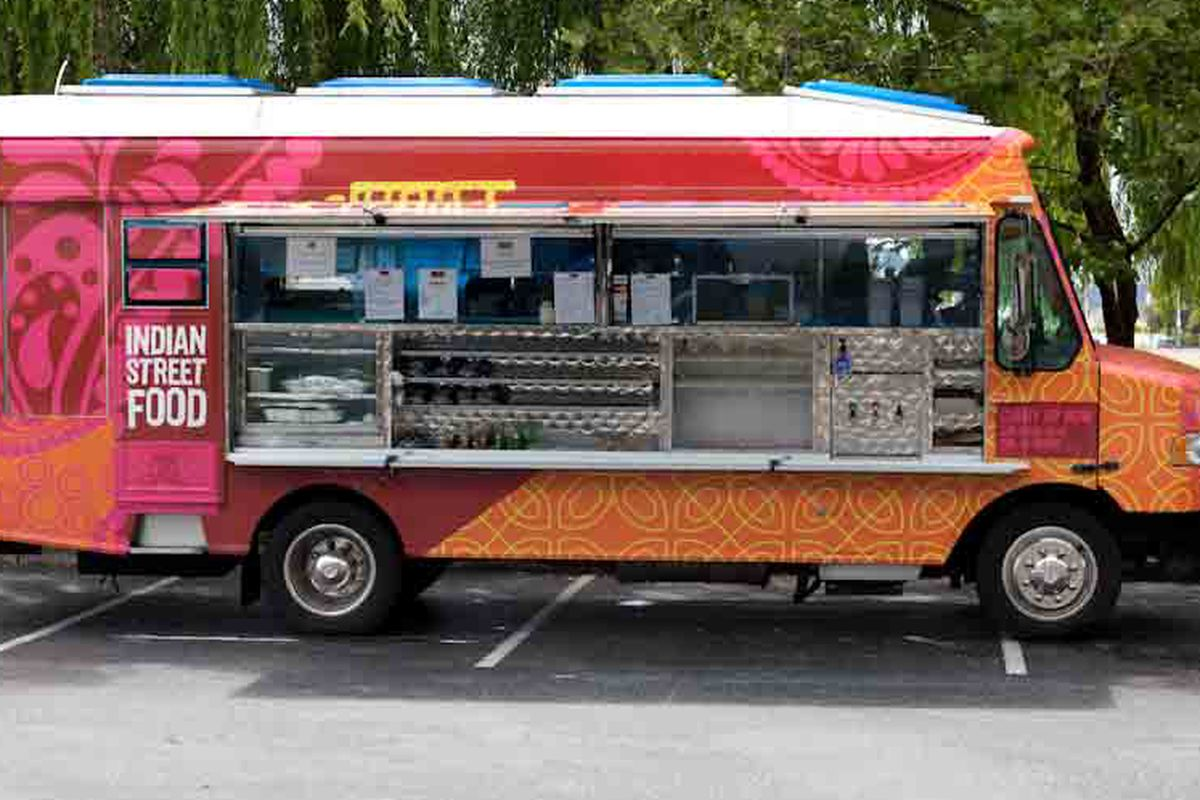

###### 5. Conclusion --> 

Food on Wheel being low cost investment idea which expected to give higher ROI need such indepth analysis which can be dig more further on menu items to be offered. We can identify sweet spots and install our setup "Food on Wheel" for month or two or even more but when customer's habits changes there taste we can identify new sweet spot with reletively new strategy to run our continuous ongoing business venture.